<a href="https://colab.research.google.com/github/anwarsan/Data-Science/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston House Price

N/A

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Boston

## Source of dataset 
Gsheet DS4 GClassroom [click here.](https://docs.google.com/spreadsheets/d/1HDCrRloBd9WS-Hy1jm9p062EnF1T6XKyo6Z7larxUWc/edit?usp=drive_web&authuser=1)

Main source : [Kaggle](https://www.kaggle.com/datasets/shree1992/housedata)

## Attribute Information:
The inputs (variable X/ independent variable) are as follows:

- date	
- bedrooms	
- bathrooms	
- sqft_living	
- sqft_lot	
- floors	
- waterfront	
- view	
- condition	
- sqft_above	
- sqft_basement	
- yr_built	
- yr_renovated	
- street	
- city	
- statezip	
- country

The output (target/Y/dependent variable) is as follow:
- price	


# 1. Import Dataset



In [ ]:
#import package
import pandas as pd
import numpy as np

In [ ]:
# to access drive if you want to use csv / xlsx file
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# to access google sheet
from google.colab import auth
import gspread
from google.auth import default


#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
# read dataset file xlsx or csv from gdrive
# df = pd.read_excel('content/drive/MyDrive/Startup Campus DS/Boston_House_Price.xlsx')

worksheet = gc.open('Boston_House_Price').sheet1
rows = worksheet.get_all_values()
df = pd.DataFrame.from_records(rows)
#df = pd.read_excel('drive/MyDrive/Startup Campus/DS4/Boston_House_Price.xlsx')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02 0:00:00,313000,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 0:00:00,2384000,5,2.5,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
3,2014-05-02 0:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
4,2014-05-02 0:00:00,420000,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


In [ ]:
#creating columns name
df.columns = df.iloc[0] # SLICING TIPE DATA NUMERIC
df = df.iloc[1:]

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02 0:00:00,313000,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02 0:00:00,2384000,5,2.5,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
3,2014-05-02 0:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
4,2014-05-02 0:00:00,420000,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
5,2014-05-02 0:00:00,550000,4,2.5,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4596,2014-07-09 0:00:00,308166.6667,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4597,2014-07-09 0:00:00,534333.3333,3,2.5,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4598,2014-07-09 0:00:00,416904.1667,3,2.5,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4599,2014-07-10 0:00:00,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4600,2014-07-10 0:00:00,220600,3,2.5,1490,8102,2,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [ ]:
# cek jumlah row dan column
df.shape

(4600, 18)

dataset ada 4600 baris dan 18 columns

In [ ]:
# Melihat columns apa saja yang ada dalam  dataset
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object', name=0)

### Feature Description

Referring to the data decription of the similar dataset ([House Sales in King Country](https://www.kaggle.com/code/vishnuramachandran/data-analysis-python-house-sales-in-king-county)).The description should be:

- date	: Date house was sold
- price : Price is prediction target
- bedrooms	: Number of bedrooms
- bathrooms	: Number of bathrooms
- sqft_living	: Square footage of the home
- sqft_lot	: Square footage of the lot
- floors	: Total floors (levels) in house
- waterfront	: House which has a view to a waterfront
- view	: Has been viewed
- condition	: How good the condition is overall
- sqft_above	: Square footage of house apart from basement
- sqft_basement	: Square footage of the basement
- yr_built	: Built Year
- yr_renovated	: Year when house was renovated
- street : street of the house area
- city	: city of the house area
- statezip	: state + Zip code
- country : country



In [ ]:
df.condition.unique()

array(['3', '5', '4', '2', '1'], dtype=object)

In [ ]:
# Check informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 1 to 4600
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   object
 2   bedrooms       4600 non-null   object
 3   bathrooms      4600 non-null   object
 4   sqft_living    4600 non-null   object
 5   sqft_lot       4600 non-null   object
 6   floors         4600 non-null   object
 7   waterfront     4600 non-null   object
 8   view           4600 non-null   object
 9   condition      4600 non-null   object
 10  sqft_above     4600 non-null   object
 11  sqft_basement  4600 non-null   object
 12  yr_built       4600 non-null   object
 13  yr_renovated   4600 non-null   object
 14  street         4600 non-null   object
 15  city           4600 non-null   object
 16  statezip       4600 non-null   object
 17  country        4600 non-null   object
dtypes: object(18)
memory usage: 

Semua columns pada dataset Boston house price bertipe string semua. Perlu mengkonversi tipe data sesuai value yang seharusnya. Namun tipe data yang sudah benar berdasarkan dataset default adalah 
- fitur street
- city 
- statezip
- country

In [ ]:
#melihai nilai yang unik
df.country.unique()

array(['USA'], dtype=object)

In [ ]:
df.city.unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [ ]:
df.bedrooms.unique()

array(['3', '5', '4', '2', '6', '7', '9', '1', '8', '0'], dtype=object)

In [ ]:
df.price.unique()

array(['313000', '2384000', '342000', ..., '416904.1667', '203400',
       '220600'], dtype=object)

In [ ]:
#data type conversion

df['date'] = pd.to_datetime(df['date'])
df['price'] = df['price'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(float)
df['floors'] = df['floors'].astype(float)
df['sqft_above'] = df['sqft_above'] .astype(int)
df['sqft_basement'] = df['sqft_basement'].astype(int)
df['sqft_lot'] = df['sqft_lot'].astype(int)
df['sqft_living'] =  df['sqft_living'].astype(int)
df['waterfront'] = df['waterfront'].astype(int)
df['yr_built'] = df['yr_built'].astype(int)
df['yr_renovated'] = df['yr_renovated'].astype(int)
df['view'] = df['view'].astype(int)
df['condition'] = df['condition'].astype(int)

In [ ]:
#check info lagi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 1 to 4600
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
3,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
4,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
5,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# 'YYYY-MM-DD HH:mm:ss' -->'YYYY-MM-DD'

df.date.unique()

array(['2014-05-02T00:00:00.000000000', '2014-05-03T00:00:00.000000000',
       '2014-05-04T00:00:00.000000000', '2014-05-05T00:00:00.000000000',
       '2014-05-06T00:00:00.000000000', '2014-05-07T00:00:00.000000000',
       '2014-05-08T00:00:00.000000000', '2014-05-09T00:00:00.000000000',
       '2014-05-10T00:00:00.000000000', '2014-05-11T00:00:00.000000000',
       '2014-05-12T00:00:00.000000000', '2014-05-13T00:00:00.000000000',
       '2014-05-14T00:00:00.000000000', '2014-05-15T00:00:00.000000000',
       '2014-05-16T00:00:00.000000000', '2014-05-17T00:00:00.000000000',
       '2014-05-18T00:00:00.000000000', '2014-05-19T00:00:00.000000000',
       '2014-05-20T00:00:00.000000000', '2014-05-21T00:00:00.000000000',
       '2014-05-22T00:00:00.000000000', '2014-05-23T00:00:00.000000000',
       '2014-05-24T00:00:00.000000000', '2014-05-25T00:00:00.000000000',
       '2014-05-26T00:00:00.000000000', '2014-05-27T00:00:00.000000000',
       '2014-05-28T00:00:00.000000000', '2014-05-29

data record pada variable date hanya satu 1 tahun observasi record, yaitu 2014 sehingga kurang relevan untuk di analisis & dimasukan ke model. Selanjurnya nanti akan mengekstrak data bulan dari variable date untuk melihat apakah ada pengaruh bulan saat unit rumah terjual dengan tingkat harga rumahnya.

#### Profiling Descriptive Stats

In [ ]:
#statistik deskriptif
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Terlihat nilai min price = 0 , perlu diinvestigasi karena tidak mungkin harga unit rumah yang terjual = 0. Sama halnya dengan bedrooms = 0.

In [ ]:
#ambil data yang pricenya = 0
df[df['price'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4355,2014-05-05,0.0,3,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4357,2014-05-05,0.0,4,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4358,2014-05-05,0.0,6,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4359,2014-05-06,0.0,5,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4362,2014-05-07,0.0,5,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA
4363,2014-05-07,0.0,4,4.00,3680,18804,2.0,0,0,3,3680,0,1990,2009,1223-1237 244th Ave NE,Sammamish,WA 98074,USA
4375,2014-05-09,0.0,2,2.50,2200,188200,1.0,0,3,3,2200,0,2007,0,39612 254th Ave SE,Enumclaw,WA 98022,USA
4377,2014-05-09,0.0,4,2.25,2170,10500,1.0,0,2,4,1270,900,1960,2001,216 SW 183rd St,Normandy Park,WA 98166,USA
4383,2014-05-12,0.0,5,4.50,4630,6324,2.0,0,0,3,3210,1420,2006,0,6925 Oakmont Ave SE,Snoqualmie,WA 98065,USA
4384,2014-05-13,0.0,5,4.00,4430,9000,2.0,0,0,3,4430,0,2013,1923,9235 NE 5th St,Bellevue,WA 98004,USA


In [ ]:
price0 = df[df['price'] == 0]
print('Jumlah baris dimana price = 0 adalah', price0.price.count())

Jumlah baris dimana price = 0 adalah 49


In [ ]:
price0.price.count()/df.price.count()

0.010652173913043479

Ada 49 baris atau 1.1% dari total data yang harga rumahnya 0.

In [ ]:
price0.city.unique()

array(['Federal Way', 'Seattle', 'Burien', 'Issaquah', 'Sammamish',
       'Enumclaw', 'Normandy Park', 'Snoqualmie', 'Bellevue',
       'Mercer Island', 'Kent', 'Lake Forest Park', 'Covington', 'SeaTac',
       'Kenmore', 'Maple Valley', 'Woodinville', 'Clyde Hill', 'Renton',
       'Black Diamond', 'Auburn'], dtype=object)

In [ ]:
#ambil data  bathrooms = 0
bathroom0 = df[df['bathrooms'] == 0]
bathroom0 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2366,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
3210,2014-06-24,1295648.0,0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA


In [ ]:
#ambil data bedrooms 0
bedroom0 = df[df['bedrooms'] == 0]
bedroom0 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2366,2014-06-12,1095000.0,0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
3210,2014-06-24,1295648.0,0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA


In [ ]:
# BUANG DATA YANG NILAINYA 0 PADA VARIABLE price, bedrooms dan bathrooms
df1 = df[df['price'] != 0]
df1 = df1[df1['bedrooms'] != 0]
df1 = df1[df1['bathrooms'] !=0]
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
2,2014-05-02,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
3,2014-05-02,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
4,2014-05-02,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
5,2014-05-02,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
# check baris x kolom
df1.shape

(4549, 18)

In [ ]:
#check apakah masih ada nilai 0 pada bedrooms
df1.bedrooms.unique()

array([3, 5, 4, 2, 6, 7, 9, 1, 8])

In [ ]:
#lihat statistik deskriptif lagi 
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.549000e+03,4549.000000,4549.000000,4549.000000,4.549000e+03,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,5.576257e+05,3.396131,2.155968,2131.578809,1.483460e+04,1.511651,0.006595,0.234337,3.449549,1821.291932,310.286876,1970.787206,808.036272
std,5.638915e+05,0.901988,0.775205,955.234941,3.597114e+04,0.537794,0.080949,0.765085,0.675242,853.292493,462.043404,29.763891,979.313181
min,7.800000e+03,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.261000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Harga rumah ini menyebar dari range 7,800 USD sampai 26,590,000 USD dengan rata-rata harga rumah 557,900 USD. Dataset sebaran harga rumahnya lebih banyak menyebar di sekitar nilai minimum (right skewed/positive skewed) jika kita lihat dari nilai mean > mediannya.

Catatan ; Q1 (25%) , Q2 (50%)= Median, Q3 (75%)

#### Distribution

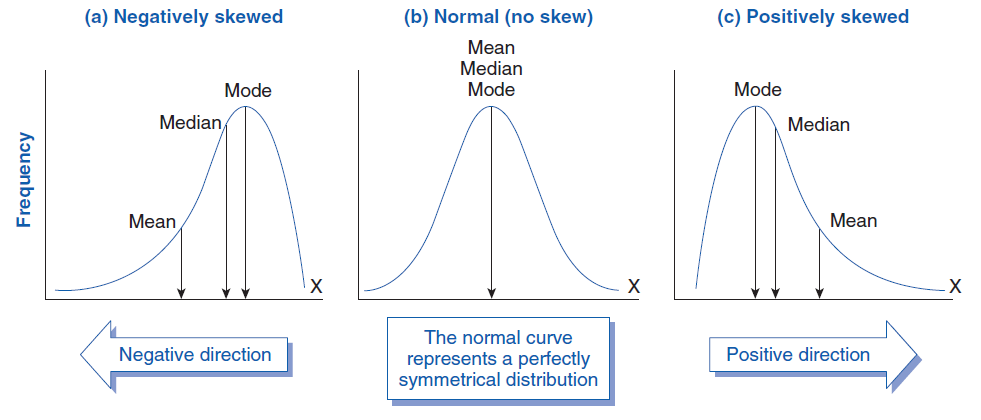

In [ ]:
import IPython

url = 'https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png'
img = IPython.display.Image(url, width = 1000)
img

# 2. Exploratory Data Analysis (EDA)

In [ ]:
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz

**Gambarkan keadaan dari harga rumah pada variable price!**

**Gambaran dapat dijelaskan melalui statistik deskriptif dari variable harga rumah tersebut.**

In [ ]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.549000e+03,4549.000000,4549.000000,4549.000000,4.549000e+03,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,5.576257e+05,3.396131,2.155968,2131.578809,1.483460e+04,1.511651,0.006595,0.234337,3.449549,1821.291932,310.286876,1970.787206,808.036272
std,5.638915e+05,0.901988,0.775205,955.234941,3.597114e+04,0.537794,0.080949,0.765085,0.675242,853.292493,462.043404,29.763891,979.313181
min,7.800000e+03,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.261000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Key takeaway: Harga rumah ini menyebar dari range 7,800 USD sampai 26,590,000 USD dengan rata-rata harga rumah 557,900 USD. Dataset sebaran harga rumahnya lebih banyak menyebar di sekitar nilai minimum (right skewed/positive skewed) jika kita lihat dari nilai mean > mediannya.

**Apakah ada nilai outlier pada variabel harga rumah? Jika ada, nilai berapa saja?**


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

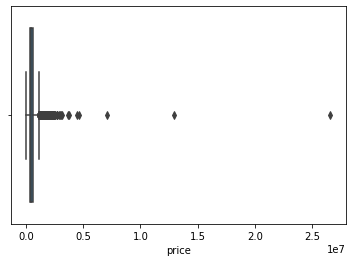

In [ ]:
#box-plot
sns.boxplot(df1['price'])

Key takeaway: Ada outliers di atas nilai maksimum data (dilihat dari beberapa titik > garis box max)

In [ ]:
#f = plt.figure(figsize=(12,4)) #opsi lebar pic
#f.add_subplot(1,2,1) # 2 img dalam satu frame / setup matplotlib img

In [ ]:
#Find Q1 & Q3
q1 = np.percentile(df1.price, 25) #np.quantile(df.Y, 0.25)
q3 = np.percentile(df1.price, 75)


In [ ]:
# Find the IQR which is the difference between third and first quartile
iqr = q3 - q1


In [ ]:
# Find lower and upper bound
lower_bond = q1 - (1.5*iqr)
upper_bond = q3 + (1.5*iqr)


In [ ]:
# Find outliers (cari nilai < lower bond | nilai > upper_bond)
df1[(df1['price'] < lower_bond) | (df1['price'] > upper_bond)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2,2014-05-02,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
12,2014-05-02,1.400000e+06,4,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
15,2014-05-02,1.200000e+06,5,2.75,2910,9480,1.5,0,0,3,2910,0,1939,1969,3534 46th Ave NE,Seattle,WA 98105,USA
100,2014-05-05,1.395000e+06,5,3.50,4010,8510,2.0,0,1,5,2850,1160,1971,0,3930 NE Belvoir Pl,Seattle,WA 98105,USA
123,2014-05-05,2.280000e+06,7,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,WA 98053,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349,2014-05-05,2.199900e+06,4,1.50,1120,5427,1.0,0,0,3,1120,0,1969,2014,19009-19021 SE 266th St,Covington,WA 98042,USA
4351,2014-07-03,2.659000e+07,3,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA
4466,2014-06-05,2.560498e+06,3,2.50,1710,1664,2.0,0,0,5,1300,410,2003,0,2826 21st Ave W,Seattle,WA 98199,USA
4468,2014-06-06,1.337044e+06,4,3.50,4280,9583,2.0,0,0,3,4280,0,2005,0,1415 108th Ave SE,Bellevue,WA 98004,USA


Key takeaway: Nilai outliersnya adalah nilai yang lebih dari upper_bondnya. Karena berdaskan distribusi data harga rumah cenderung right skewed, artinya banyak data mengumpul di titik minimum, sehingga outlier ini perlu dibuang karena merupakan outlier major (nilai > nilai maksimum)

In [ ]:
#drop outlier
df2 = df1[~((df1['price'] < lower_bond) | (df1['price'] > upper_bond))]

In [ ]:
# check kolom x baris setelah outlier di drop
df2.shape

(4310, 18)

In [ ]:
#ektract data bulan dari column date
df2['month'] = pd.to_datetime(df2['date'], errors='coerce', utc=True).dt.strftime('%m')

<ipython-input-42-a9ad5828245d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = pd.to_datetime(df2['date'], errors='coerce', utc=True).dt.strftime('%m')


In [ ]:
df2.month

1       05
3       05
4       05
5       05
6       05
        ..
4596    07
4597    07
4598    07
4599    07
4600    07
Name: month, Length: 4310, dtype: object

In [ ]:
#konversi nilai bulan jadi int
df2['month'] = df2['month'].astype(int)

<ipython-input-44-53985f049381>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['month'] = df2['month'].astype(int)


In [ ]:
#drop unnecessary columns
df3 = df2.drop(['date','street','city', 'statezip',	'country'] , inplace=False, axis=1)


In [ ]:
df3.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month
1,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,5
3,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,5
4,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,5
5,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,5
6,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,5


**Variabel apa saja yang berkorelasi dengan harga rumah? Bagaimana arah dan seberapa
erat hubungannya?**

**Note : Jika koef korelasi >= 0.5, ada hubungan antar variabel**

**Jika koef korelasi < 0.5, tidak ada hubungan antar variabel**

In [ ]:
# koefisien korelasi (-1 < r < 1), dimana nilai negatif menandakkan arah hubungannya (positif atau negatif), 
# koef korelasi makin mendekati 1, semakin kuat korelasinya
# koef korelasi makin mendekati 0, makin lemah hubungannya
df3.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month
0,,,,,,,,,,,,,,
price,1.000000,0.312379,0.479641,0.631640,0.098891,0.274865,0.072500,0.223802,0.048157,0.542951,0.230047,0.062153,-0.071665,0.034800
bedrooms,0.312379,1.000000,0.520654,0.599272,0.059947,0.155531,-0.033128,0.064149,0.014894,0.465981,0.307045,0.156404,-0.065829,0.015746
bathrooms,0.479641,0.520654,1.000000,0.724154,0.088099,0.495838,0.014592,0.120278,-0.142400,0.647118,0.219221,0.517740,-0.239860,0.026882
sqft_living,0.631640,0.599272,0.724154,1.000000,0.202328,0.332670,0.026173,0.195750,-0.082957,0.857395,0.368168,0.332525,-0.138375,0.034778
sqft_lot,0.098891,0.059947,0.088099,0.202328,1.000000,-0.001818,0.024335,0.076084,0.006556,0.200528,0.025619,0.040453,-0.015183,-0.021985
floors,0.274865,0.155531,0.495838,0.332670,-0.001818,1.000000,0.004166,-0.013444,-0.292889,0.525358,-0.311326,0.499173,-0.246325,0.031309
waterfront,0.072500,-0.033128,0.014592,0.026173,0.024335,0.004166,1.000000,0.303303,0.022226,0.013904,0.025057,-0.034658,0.011691,-0.000529
view,0.223802,0.064149,0.120278,0.195750,0.076084,-0.013444,0.303303,1.000000,0.043286,0.081277,0.228441,-0.062874,0.040713,-0.024085
condition,0.048157,0.014894,-0.142400,-0.082957,0.006556,-0.292889,0.022226,0.043286,1.000000,-0.202532,0.206849,-0.397882,-0.183031,0.017739


<ipython-input-48-fe9326d0170b>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'price'),
  Text(0, 1.5, 'bedrooms'),
  Text(0, 2.5, 'bathrooms'),
  Text(0, 3.5, 'sqft_living'),
  Text(0, 4.5, 'sqft_lot'),
  Text(0, 5.5, 'floors'),
  Text(0, 6.5, 'waterfront'),
  Text(0, 7.5, 'view'),
  Text(0, 8.5, 'condition'),
  Text(0, 9.5, 'sqft_above'),
  Text(0, 10.5, 'sqft_basement'),
  Text(0, 11.5, 'yr_built'),
  Text(0, 12.5, 'yr_renovated'),
  Text(0, 13.5, 'month')])

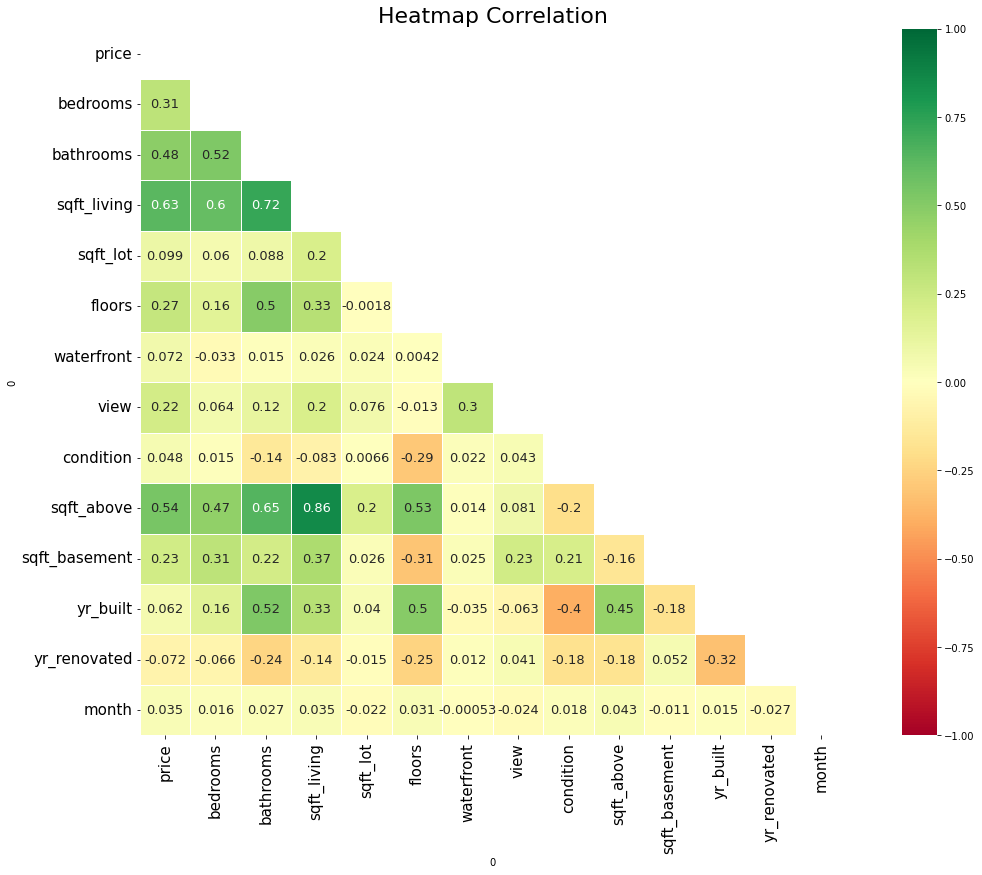

In [ ]:
#Heatmap Correlation
import seaborn as sns

corr = df3.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.7, annot_kws={"size": 13})
plt.xticks(rotation=90, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway: Berdasrkan correlation test, dapat diketahui bahwa ada hubungan positif antara bedrooms (0.31), bathrooms (0.48), sqft_living (0.63), floors (0.27), view (0.22), sqft_above (0.54), sqft_basement (0.23) dengan harga rumah.

Korelasi yang paling kuat:
- sqft_living vs price (0.63)
- sqft_above vs price (0.54)




### bedrooms vs price

In [ ]:
import matplotlib.pyplot as plt

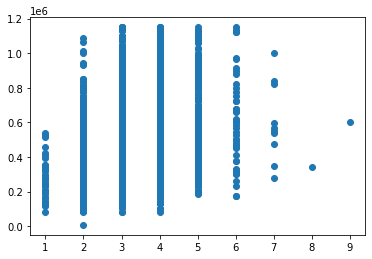

In [ ]:
# bedrooms vs price (plt.scatter(X,Y))
plt.scatter(df3['bedrooms'],df3['price'])

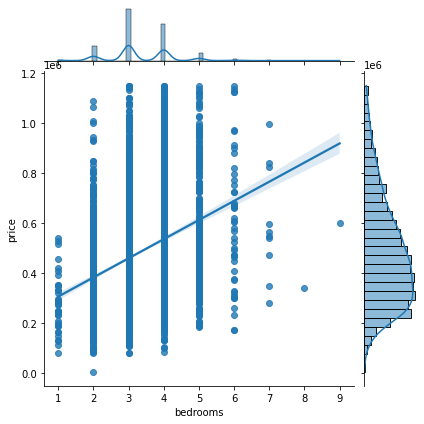

In [ ]:
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='bedrooms', y='price', data=df3, kind="reg")

Key takeaway: Berdasarkan scatterplot dengan garis regresi dapat disimpulkan bahwa banyaknya bedroom dan harga rumah berhubungan positif (garis regresi yang cenderung membagi data dengan arah diagonal kiri bawah ke kanan atas). Semakin banyak bedroom semakin mahal harga unit rumahnya.

### bathrooms vs price

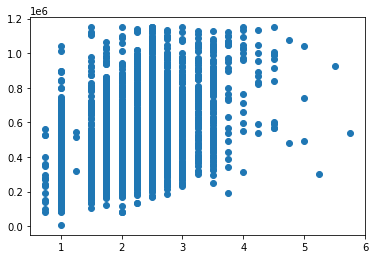

In [ ]:
# bathrooms vs House Price Plot
plt.scatter(df3['bathrooms'],df3['price'])

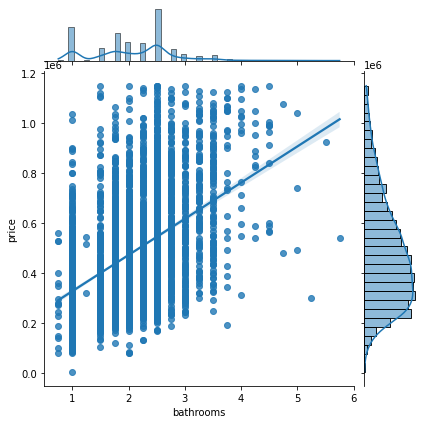

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='bathrooms', y='price', data=df3, kind="reg")

Key takeaway: banyaknya bathroom berhubungan positif dengan harga rumah. Artinya semakin banyak / luas bathroomnya semakin mahal harga rumahnya

### sqft_living vs price

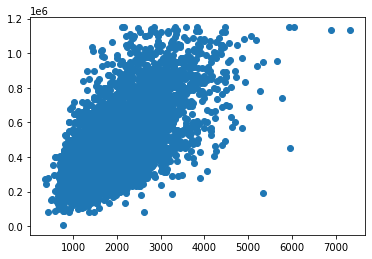

In [ ]:
# sqft_living vs House Price
plt.scatter(df3['sqft_living'],df3['price'])

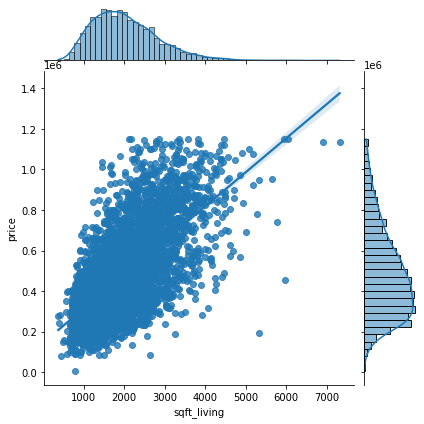

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='sqft_living', y='price', data=df3, kind="reg")

Key takeaway: sqft_living berkorelasi positif dengan harga rumah. Artinya, semakin luas living roomnya semakin mahal harga rumahnya.

### sqft_above vs price

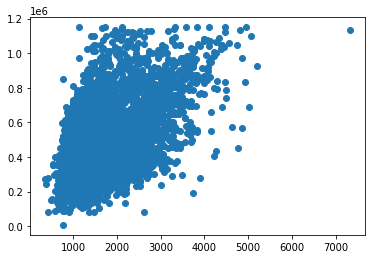

In [ ]:
# sqft_above vs House Price
plt.scatter(df3['sqft_above'],df3['price'])

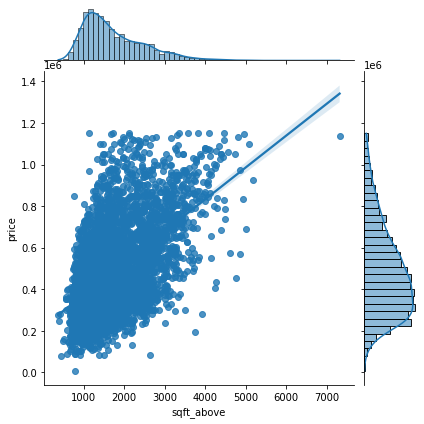

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='sqft_above', y='price', data=df3, kind="reg")

Key takeaway: Ada hubungan positif antara sqft_above dan harga rumah. Semakin tinggi nilai sqft_above makin mahal pula harga rumahnya.

### sqft_basement vs price

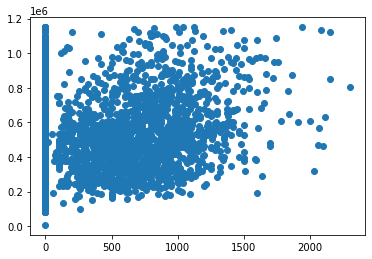

In [ ]:
# sqft_basement vs House Price
plt.scatter(df3['sqft_basement'], df3['price'])

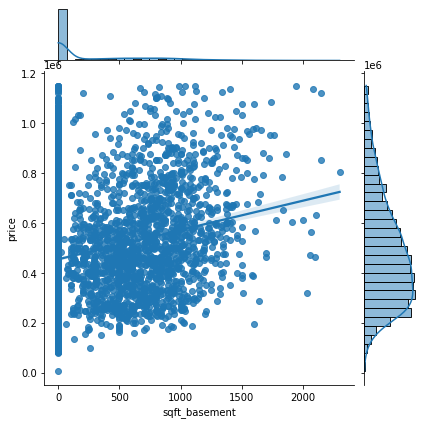

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='sqft_basement', y='price', data=df3, kind="reg")

Key takeaway: Ada hubungan positif antara sqft_basement dengan price. Semakin tinggi nilai sqft_basement makin mahal harga rumah.

### view vs price


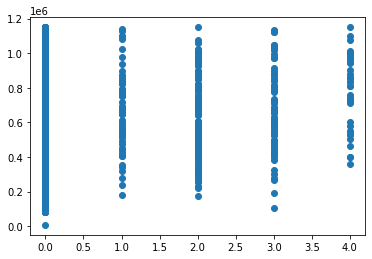

In [ ]:
# view vs House Price
plt.scatter(df3['view'], df3['price'])

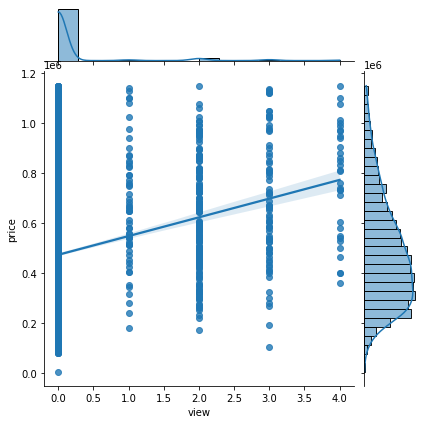

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='view', y='price', data=df3, kind="reg")

Key takeaway: Ada hubungan positif antara banyaknya pemandangan sekitar rumah dengan harga rumah. Makin banyak pemandangan di sekitar areal rumah, makin mahal pula harga rumahnya.

### floors vs price

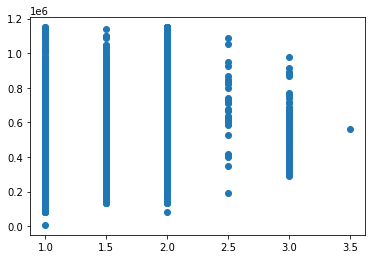

In [ ]:
# floors vs House Price
plt.scatter(df3['floors'], df3['price'])

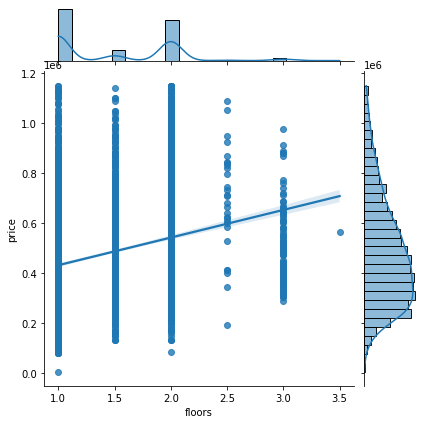

In [ ]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='floors', y='price', data=df3, kind="reg")


Key takeaway: Ada hubungan positif antara banyaknya lantai/tingkat rumah dengan harga rumah. Makin banyak lantai/tingkat rumah, makin mahal pula harga rumahnya

## Feature Engineering & Selection

**Feature engineering:** membuat fitur/variable baru dari dataset yang ada sebelumnya, contohnya langkah di atas tadi yaitu membuat fitur month dengan mengekstrak nilai dari variable date.


**Feature selection:** pemilihan fitur yang akan dimasukkan ke dalam model. Dalam hal ini setelah proses analisis korelasi diputuskan bahwa hanya 4 fitur yang akan dimasukkan ke dalam model regresi karena fitur ini yang memiliki hubungan yang kuat dengan variabel target. Fitur-fitur tersebut adalah bedrooms (0.31), bathrooms (0.48), sqft_living (0.63), dan sqft_above (0.54). 

# 3. Data Preprocessing

### Check null values

In [ ]:
df3.isna().sum().sort_values(ascending=False)

0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
month            0
dtype: int64

Key takeaway: tidak ada missing values

### Data Type Conversion
lihat di bagian awal

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4310 entries, 1 to 4600
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4310 non-null   float64
 1   bedrooms       4310 non-null   int64  
 2   bathrooms      4310 non-null   float64
 3   sqft_living    4310 non-null   int64  
 4   sqft_lot       4310 non-null   int64  
 5   floors         4310 non-null   float64
 6   waterfront     4310 non-null   int64  
 7   view           4310 non-null   int64  
 8   condition      4310 non-null   int64  
 9   sqft_above     4310 non-null   int64  
 10  sqft_basement  4310 non-null   int64  
 11  yr_built       4310 non-null   int64  
 12  yr_renovated   4310 non-null   int64  
 13  month          4310 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 634.1 KB


In [ ]:
df3.dtypes

0
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
month              int64
dtype: object

### Checking duplicate values

In [ ]:
# Check duplicate values
df3[df3.duplicated(keep=False)]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month


Key takeaway: tidak ada duplikat data

# 4. Model Development

In [ ]:
#pisahkan varible X dan Y, dimana X diisi oleh variable yang dibutuhkan aja yang udah kita tentukan di feature selection
X = df3[['bedrooms','bathrooms', 'sqft_living','sqft_above']]

In [ ]:
y = pd.DataFrame(df3['price'])

In [ ]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X

,bedrooms,bathrooms,sqft_living,sqft_above
1,3,1.50,1340,1340
3,3,2.00,1930,1930
4,3,2.25,2000,1000
5,4,2.50,1940,1140
6,2,1.00,880,880
...,...,...,...,...
4596,3,1.75,1510,1510
4597,3,2.50,1460,1460
4598,3,2.50,3010,3010
4599,4,2.00,2090,1070


In [ ]:
y

,price
1,313000.0000
3,342000.0000
4,420000.0000
5,550000.0000
6,490000.0000
...,...
4596,308166.6667
4597,534333.3333
4598,416904.1667
4599,203400.0000


In [ ]:
# 80% data untuk dilatih
X_train

,bedrooms,bathrooms,sqft_living,sqft_above
2603,3,2.50,1212,1212
1534,3,1.50,1470,1470
402,4,2.25,2470,2470
3738,3,2.50,2010,2010
1652,4,2.50,2720,2720
...,...,...,...,...
3056,6,2.75,2660,1550
2917,4,2.50,3040,3040
951,3,2.25,1990,1990
4208,4,1.50,1860,1860


### Feature Scaling
agar model dapat diterapkan pada semua fitur dengan adil, semua fitur punya kontribusi yang sama besar terhadap hasil model yang dibuat maka perlu distandardisasi

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
#menampilkan dataset X_train setalag di scaling
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[-0.40225565  0.55057493 -1.01625774 -0.70466724]
 [-0.40225565 -0.84838038 -0.69791375 -0.36945263]
 [ 0.72904736  0.2008361   0.53597767  0.92982879]
 [-0.40225565  0.55057493 -0.03161238  0.33215933]
 [ 0.72904736  0.55057493  0.84445053  1.25464914]
 [ 1.86035036  0.55057493  1.44905732  0.09828868]
 [-0.40225565 -0.14890273  0.59767224 -0.44740952]
 [ 0.72904736 -0.84838038 -0.3894409  -0.04463228]
 [ 4.12295638  3.34848553  2.59657635  0.41011622]
 [ 0.72904736 -0.14890273  1.36268492  0.37113778]]


In [ ]:
print(y_train[:10])

         price
2603  340000.0
1534  264000.0
402   565000.0
3738  515000.0
1652  545000.0
2492  725000.0
1478  840500.0
3091  360000.0
1480  565000.0
2980  925000.0


## Linear Regression

In [ ]:
#Model linear regression untuk memprediksi nilai harga rumah 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) #melatih data menggunakan model regresi linear, hasil pelatihan data akan terecord di variable model

LinearRegression()

In [ ]:
#untuk memprediksi 
ypred_lr = model.predict(X_test)

In [ ]:
#hasil prediksi y
ypred_lr

array([[ 368467.14300678],
       [ 575792.35680764],
       [ 559623.80358356],
       [ 885950.10447475],
       [ 396049.99163915],
       [ 421090.28389981],
       [ 311102.00006119],
       [ 385145.3244669 ],
       [ 660291.13922218],
       [ 580540.91550261],
       [ 439066.38473096],
       [ 340861.05338875],
       [ 655234.78923601],
       [ 371357.32782535],
       [ 369631.94722422],
       [ 802383.46492062],
       [ 532790.83505475],
       [ 372640.0771506 ],
       [ 318215.60531065],
       [ 554365.61665256],
       [ 498336.6985823 ],
       [ 359279.66361746],
       [ 518994.46876646],
       [ 386960.55613371],
       [ 427409.62511076],
       [ 293715.20077466],
       [ 300616.72317916],
       [ 673045.10868592],
       [ 483625.01200637],
       [ 544134.93297338],
       [ 641858.88570507],
       [ 793566.71573158],
       [ 704621.7703933 ],
       [ 622301.13901383],
       [ 299613.5155196 ],
       [ 518182.35658597],
       [ 375663.25524443],
 

In [ ]:
# evaluate model -> r2 (koef determinasi) makin tinggi makin bagus akurasinya dan juga melihat error model (makin kecil error makin bagus modelnya)
display(model.score(X_test, y_test))

0.3930243695840866

In [ ]:
from sklearn.metrics import r2_score # koef determinasi (r-square) menunjukkan seberapa besar model mampu menjelaskan keragaman datanya
from sklearn.metrics import mean_squared_error #MSE = selisih nial aktual - nilai prediction = nilai error model
from sklearn.metrics import mean_absolute_error # abs(aktual - prediction)

#### MSE

In [ ]:

mse_lr = mean_squared_error(y_test, ypred_lr).round(2)
mae_lr = mean_absolute_error(y_test, ypred_lr).round(2)
rmse_lr = np.sqrt(mean_squared_error(y_test, ypred_lr)).round(2) #akar mse

print('MSE : ', mse_lr)
print('MAE : ', mae_lr)
print('RMSE : ', rmse_lr)

MSE :  26943772145.52
MAE :  131483.61
RMSE :  164145.58


#### R-Square

In [ ]:
#menghitung r2 dengan pembulatan 2 angka setelah koma
r2_lr = r2_score(y_test,ypred_lr).round(2)
r2_lr

0.39

Key takeaway: Model regresi linear hanya memiliki akurasi 39%. Artinya 39%  (bedrooms, bathrooms, sqft_living, sqft_above) mampu menjelaskan keragaman datanya, sisanya 61% dapat dijelaskan oleh variabel lain di luar model. 

* Note: Model regresi cukup baik jika R2 >= 75%.

# 5. Conclusion

Model regresi memiliki akurasi model 39% dengan error model (MSE = 26943772145.52) belum cukup baik untuk diimplementasikan ke tahap production. Sebelum dilakukan proses deployment, perlu memperbaiki akurasi model seperti melakukan Hyperparameter tuning agar akurasi modelnya meningkat atau menggunakan metode lain seperti Random Forest Regression dan Support Vector Regression untuk memprediksi harga rumah ini sehingga didapatkan akurasi model yang optimal.

In [ ]:
# buat prediksi harga rumah dari hasil model yang telah dibangun jika diketahui ada data baru
#jika diketahui ada bedrooms, bathrooms,sqft_living, sqft_above, masing2 nilainya 2, 3, 3000, 1000. 

model.predict([[2, 3, 3000, 1000]])

array([[4.24690562e+08]])

Prediksi harga rumah jika diketahui data baru dengan karakteristik bedrooms, bathrooms,  sqft_living, dan sqft_above tersebut seperti itu maka harga rumahnya diprediksi sebesar 425,000,000 USD